In [3]:
from core.memristive_rhs import memristive_rhs
from core.lorenz_system_rhs import lorenz_rhs
from core.solver import integrate_system, integrate_system_rk4
from plotting.plotting import phase_portrait, animated_phase_portrait
from in_out.io_utils import save_trajectory_csv

In [4]:
# Choose which solver to use: "ivp" (scipy.solve_ivp) or "rk4" (fixed-step)
solver_method = "ivp" 

if solver_method == "ivp":
    integrate = integrate_system
elif solver_method == "rk4":
    integrate = integrate_system_rk4
else:
    raise ValueError(f"Unknown solver_method: {solver_method}")


In [5]:
# Parameters
a = 0.0
b = 0.1
c = 0.0
# Initial conditions
y0 = [-1.53, 0.33, 0.39]
# Integration settings
t_step = 0.01
t_final = 5000
transient = 25000

In [6]:
# Define the RHS with fixed parameters
def rhs(t, y):
    return memristive_rhs(t, y, a=a, b=b, c=c)

sol = integrate(rhs, (0, t_final), y0, t_step=t_step)
t = sol.t
y = sol.y

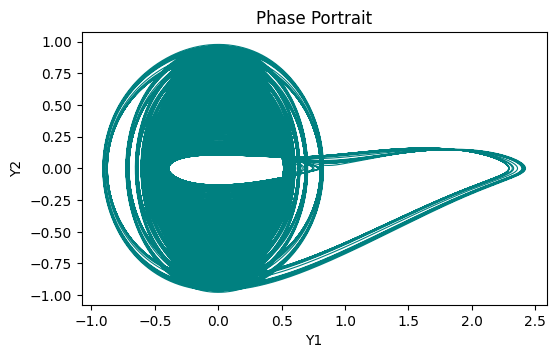

In [7]:
# static Plot and save
phase_portrait(y, x_index=0, y_index=1, transient_steps=transient)
save_trajectory_csv("output.csv", t, y)

In [ ]:
# animated Plot
animated_phase_portrait(y, x_index=0, y_index=1, transient_steps=transient, title="Reference System: Y2 vs Y1 (animated)", 
                        total_duration_seconds=15, filename="15s.gif")

Saved animated phase portrait to '15s.gif'


In [10]:
# parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Initial conditions settings
y0 = [1.0, 1.0, 1.0]

# integration settings
t_final = 40.0
t_step = 0.01
transient = 1000

In [11]:
def rhs(t, y):
    return lorenz_rhs(t, y, sigma=sigma, rho=rho, beta=beta)

# Integrate with selected method
sol = integrate(rhs, (0.0, t_final), y0, t_step=t_step)

t = sol.t
y = sol.y



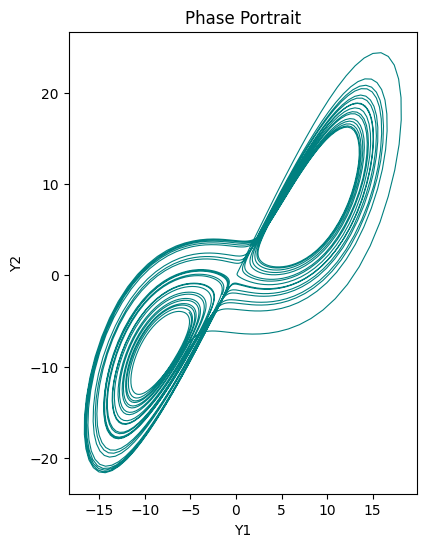

In [ ]:
# Static phase portrait: y vs x
phase_portrait(y, x_index=0, y_index=1, transient_steps=transient)

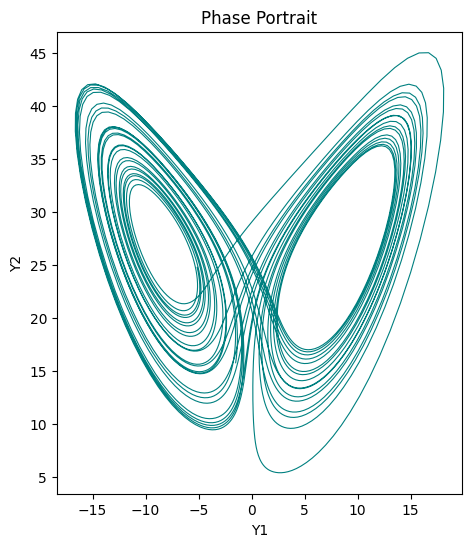

In [ ]:
# Static phase portrait: z vs x
phase_portrait(y, x_index=0, y_index=2, transient_steps=transient)

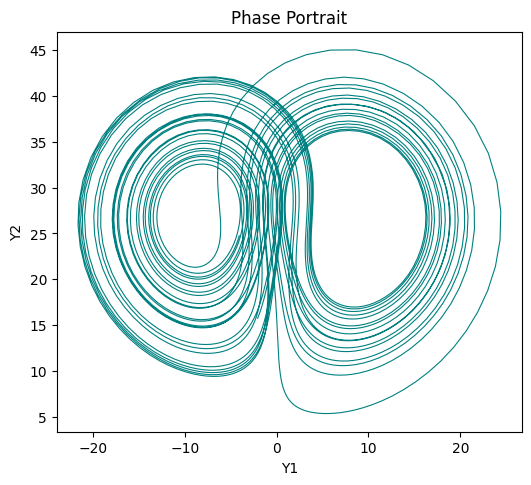

In [ ]:
# Static phase portrait: z vs y
phase_portrait(y, x_index=1, y_index=2, transient_steps=transient)

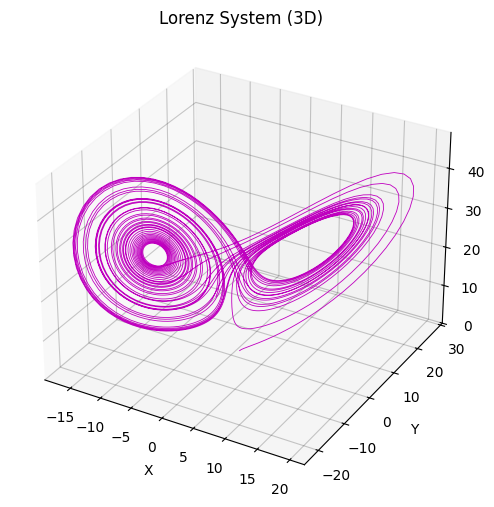

In [ ]:
from matplotlib import pyplot as plt

x = y[0]
y_coord = y[1]
z = y[2]

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")

# Trajectory 
ax.plot(x, y_coord, z, "m", linewidth=0.6)

# Axis labels
ax.set_xlabel("X", color="black")
ax.set_ylabel("Y", color="black")
ax.set_zlabel("Z", color="black")
ax.set_title("Lorenz System (3D)", color="black")

# Make axes/spines black
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.label.set_color("black")
    axis._axinfo["grid"]["color"] = (0, 0, 0, 0.2)

plt.show()

In [ ]:
# Animated phase portrait x vs y(GIF, 15 s)
animated_phase_portrait(
    y,
    x_index=0,
    y_index=1,
    transient_steps=transient,
    xlabel="x",
    ylabel="y",
    title="Lorenz System: y vs x (animated)",
    total_duration_seconds=15,
    filename="lorenz_phase_15s.gif",
)